# **Import The Libraries**

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Data Preparation**
**Dataset Format and Directory structure:**

dataset/

  ├── Bear/

  ├── Bird/

  ├── Cat/

  ├── ...

  └── Zebra/

In [15]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)


# **Training Dataset**

In [16]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/ML Datasets/Animal Classification dataset/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 1560 images belonging to 15 classes.


## **Validating Dataset**

In [17]:
val_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/ML Datasets/Animal Classification dataset/",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 383 images belonging to 15 classes.


# **Build the Model (Transfer Learning Approach)**
**Use a pre-trained model like MobileNetV2, ResNet50, or EfficientNetB0.**

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(15, activation='softmax')  # 15 classes
])

# **Compile the Model**

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Train the Model**

In [25]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)  # You can increase this based on hardware


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 348s 7s/step - accuracy: 0.7714 - loss: 0.7608 - val_accuracy: 0.8747 - val_loss: 0.3804
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 345s 7s/step - accuracy: 0.8739 - loss: 0.3986 - val_accuracy: 0.8851 - val_loss: 0.3383
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 344s 7s/step - accuracy: 0.8988 - loss: 0.3208 - val_accuracy: 0.9034 - val_loss: 0.2852
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 346s 7s/step - accuracy: 0.9286 - loss: 0.2351 - val_accuracy: 0.8773 - val_loss: 0.3544
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 342s 7s/step - accuracy: 0.9355 - loss: 0.2302 - val_accuracy: 0.9086 - val_loss: 0.2912
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 349s 7s/step - accuracy: 0.9510 - loss: 0.1571 - val_accuracy: 0.9164 - val_loss: 0.2736
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 346s 7s/step - accuracy: 0.9580 - loss: 0.1437 - val_accuracy: 0.8877 - val_loss: 0.3222
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 349s 7s/step - accuracy: 0.9490 - loss: 0.1613 - val_accuracy: 0.9138 - v

# **Evaluate and Fine-tune the model**
**Optionally unfreeze some layers of the base model to improve performance.**

In [26]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower LR for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tuning the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 391s 7s/step - accuracy: 0.9676 - loss: 0.0854 - val_accuracy: 0.9112 - val_loss: 0.2847
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 346s 7s/step - accuracy: 0.9724 - loss: 0.0890 - val_accuracy: 0.9034 - val_loss: 0.2706
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 347s 7s/step - accuracy: 0.9698 - loss: 0.0902 - val_accuracy: 0.9086 - val_loss: 0.2650
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 345s 7s/step - accuracy: 0.9686 - loss: 0.0937 - val_accuracy: 0.9295 - val_loss: 0.2517
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 337s 7s/step - accuracy: 0.9813 - loss: 0.0738 - val_accuracy: 0.9321 - val_loss: 0.2296


# **Evaluate and Visualize The Model**

# **Plot training history**

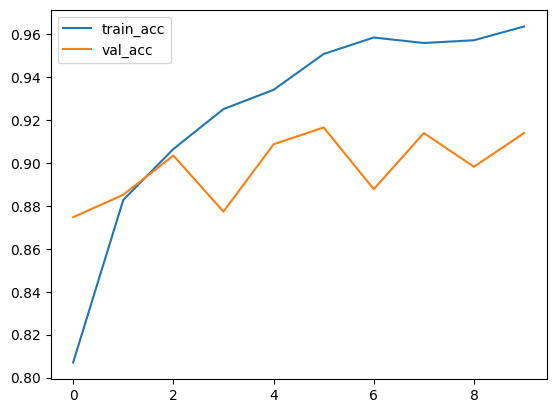

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# **Confusion Matrix And Classification Report**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(val_generator.classes, y_pred, target_names=list(val_generator.class_indices.keys())))

12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
              precision    recall  f1-score   support

        Bear       0.17      0.16      0.17        25
        Bird       0.11      0.11      0.11        27
         Cat       0.08      0.08      0.08        24
         Cow       0.00      0.00      0.00        26
        Deer       0.04      0.04      0.04        25
         Dog       0.00      0.00      0.00        24
     Dolphin       0.04      0.04      0.04        25
    Elephant       0.10      0.12      0.11        26
     Giraffe       0.12      0.12      0.12        25
       Horse       0.04      0.04      0.04        26
    Kangaroo       0.15      0.16      0.15        25
        Lion       0.14      0.12      0.12        26
       Panda       0.04      0.04      0.04        27
       Tiger       0.00      0.00      0.00        25
       Zebra       0.07      0.07      0.07        27

    accuracy                           0.07       383
   macro avg       0.07      0.07      0.

# **Make Predictions on New Images**

**Load and preprocess the image**

**Change the path of the image below to the path of the image uploaded**

**Display the uploaded image**

**Predict the animal shown in the image**


**Import The Libraries**

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# **Prediction 1**

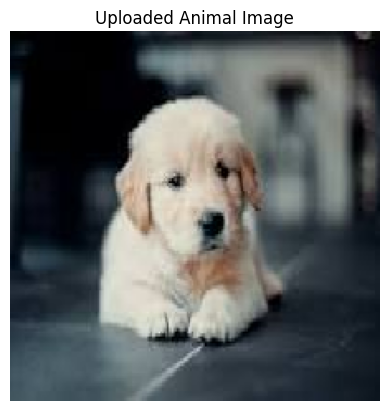

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Animal: Dog


In [30]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test dog.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 2**

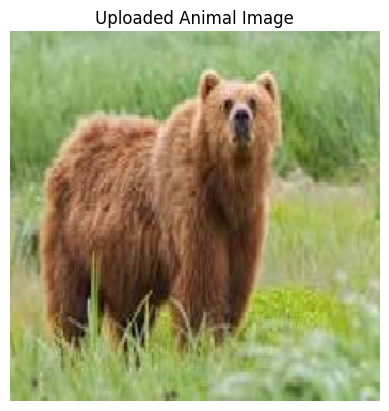

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Predicted Animal: Bear


In [31]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test bear.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 3**

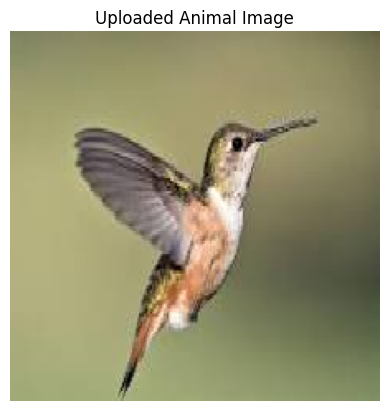

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted Animal: Bird


In [32]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test bird.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 4**

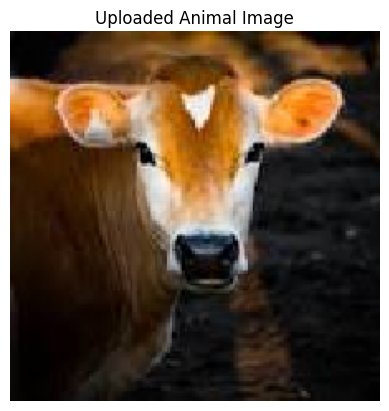

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Animal: Cow


In [33]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test cow.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 5**

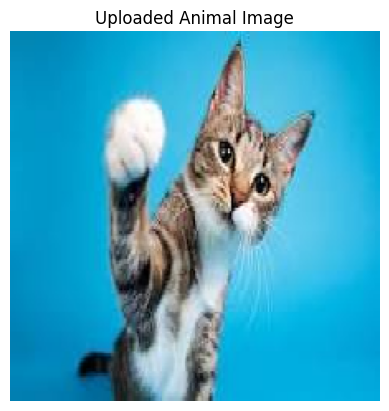

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Animal: Cat


In [34]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test cat.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 6**

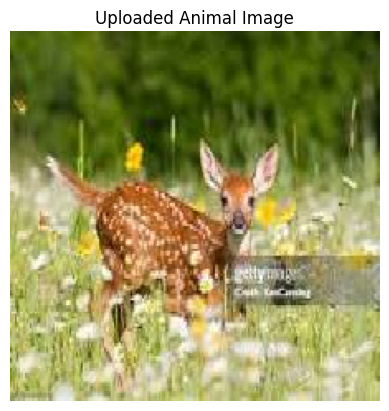

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Animal: Deer


In [35]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test deer.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 7**

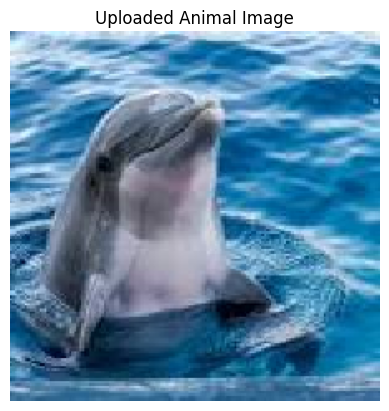

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Animal: Dolphin


In [36]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test dolphin.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 8**

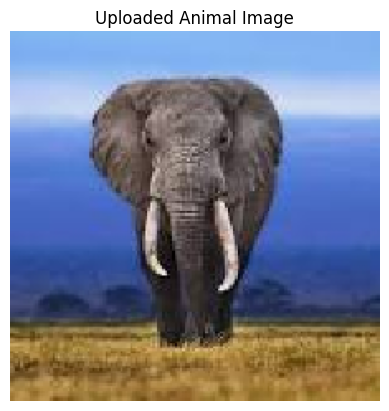

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Animal: Elephant


In [37]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test elephant.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 9**

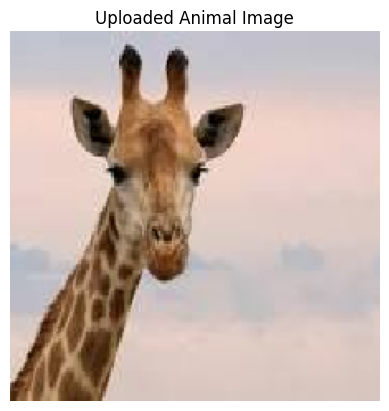

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Animal: Cow


In [38]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test giraffe.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 10**

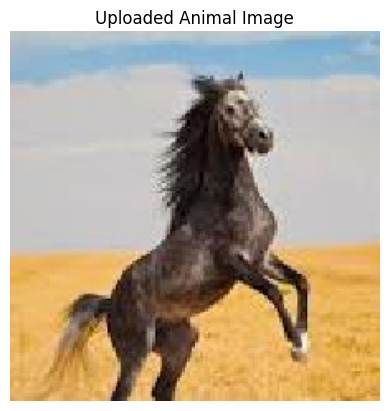

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Animal: Horse


In [39]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test horse.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 11**

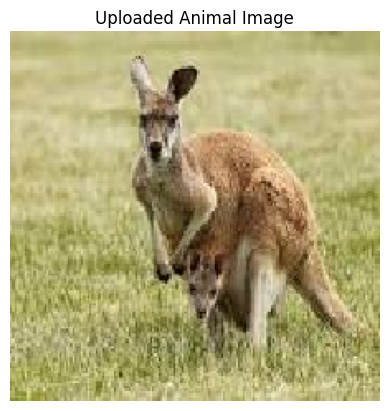

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Animal: Kangaroo


In [40]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test kangaroo.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 12**

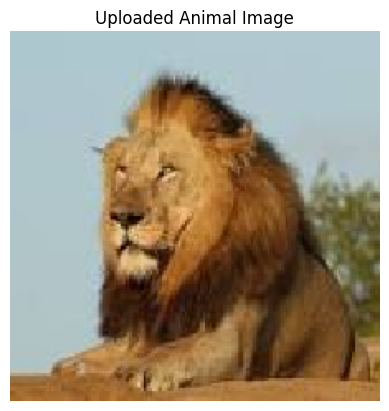

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Animal: Lion


In [41]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test lion.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 13**

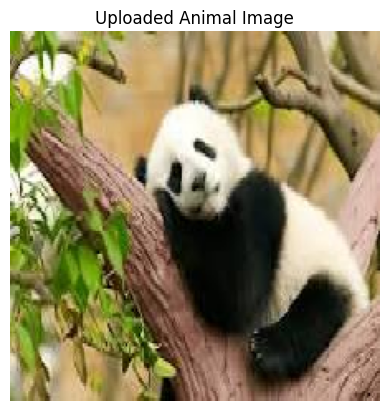

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Animal: Panda


In [42]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test panda.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 14**

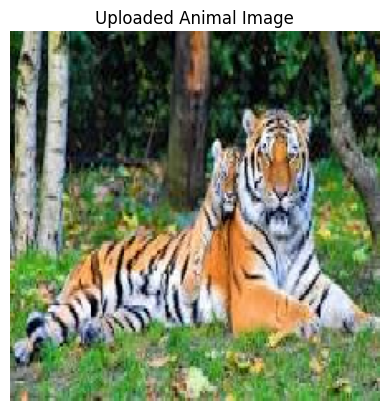

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Animal: Tiger


In [43]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test tiger.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)

# **Prediction 15**

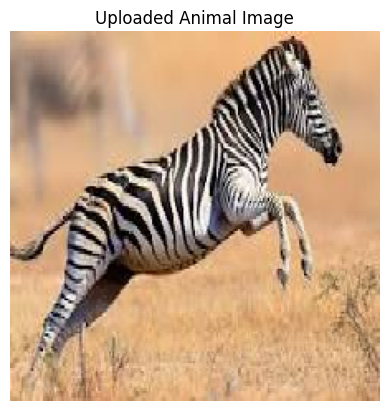

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Animal: Zebra


In [44]:
# Load and preprocess the image
# Change the path of the image below to the path of the image uploaded
img = image.load_img('/content/drive/MyDrive/ML Datasets/Test Images/test zebra.jpg', target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
# Predict the animal shown in the image
predictions = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(predictions)]
print("Predicted Animal:", predicted_class)